### Projet: MLops  

In [121]:
# Install the following librairies (it is better to create a venv (or conda) virtual environment first and install these librairies in it)
!pip install mlflow
!pip install --upgrade jinja2
!pip install --upgrade Flask
!pip install setuptools

In [122]:

# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080


^C


In [123]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor


In [125]:
# In order to connect to the tracking server, we’ll need to use the uri that we assigned the server when we started it.

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

#it allows programmatic interaction with the MLflow tracking server.

In [126]:
all_experiments = client.search_experiments()

print(all_experiments)


[<Experiment: artifact_location='file:///c:/Users/ec/OneDrive/Bureau/Projet_Mlops_best/mlruns/247502922017750485', creation_time=1730632660897, experiment_id='247502922017750485', last_update_time=1730632660897, lifecycle_stage='active', name='Bank_Model_Experiment', tags={'department': 'Bbank',
 'mlflow.note.content': 'Ceci est un projet de prévision bancaire utilisant '
                        "des modèles de régression logistique. L'expérience "
                        'inclut différents runs et modèles entraînés pour '
                        'prédire le comportement bancaire.',
 'project_name': 'Projet Mlops',
 'project_quarter': 'Q3-2024',
 'team': 'stores-ml'}>, <Experiment: artifact_location='file:///c:/Users/ec/OneDrive/Bureau/Projet_Mlops_best/mlruns/799410146369794912', creation_time=1730631482194, experiment_id='799410146369794912', last_update_time=1730631482194, lifecycle_stage='active', name='Mlops_Model_Experiment', tags={'department': 'Banque',
 'mlflow.note.content': 

In [127]:
import mlflow
from mlflow.tracking import MlflowClient

# Description: Ce script crée une nouvelle expérience dans MLflow pour un projet de régression logistique dans un cadre bancaire.
# L'expérience est associée à des tags pour faciliter l'organisation et la recherche des runs associés.

# Créer un client MLflow pour interagir avec le serveur MLflow
client = MlflowClient()

# Fournir une description pour l'expérience qui apparaîtra dans l'interface utilisateur MLflow
experiment_description = (
    "Ceci est un projet de prévision bancaire utilisant des modèles de régression logistique. "
    "L'expérience inclut différents runs et modèles entraînés pour prédire le comportement bancaire."
)

# Fournir des tags recherchables qui définissent les caractéristiques des runs de cette expérience
experiment_tags = {
    "project_name": "Projet Mlops",         # Nom du projet
    "department": "Bbank",                  # Département concerné
    "team": "stores-ml",                    # Équipe responsable du projet
    "project_quarter": "Q3-2024",           # Période du projet
    "mlflow.note.content": experiment_description  # Ajouter la description comme une note
}

# Créer une nouvelle expérience MLflow, en fournissant un nom unique
produce_bank_experiment = client.create_experiment(
    name="Bank_Model_Experiment", tags=experiment_tags
)

# Définir l'expérience active pour tous les runs futurs dans cette session
mlflow.set_experiment(experiment_id=produce_bank_experiment)

# Confirmer la création de l'expérience
print(f"Expérience créée avec l'ID : {produce_bank_experiment}")


MlflowException: Experiment 'Bank_Model_Experiment' already exists.

In [ ]:

# Rechercher une expérience MLflow en utilisant le tag `project_name`
bank_experiment = client.search_experiments(
    filter_string="tags.`project_name` = 'Projet Mlops'"
)

# Afficher les détails de la première expérience trouvée
print(vars(bank_experiment[0]))


{'_experiment_id': '247502922017750485', '_name': 'Bank_Model_Experiment', '_artifact_location': 'file:///c:/Users/ec/OneDrive/Bureau/Projet_Mlops_best/mlruns/247502922017750485', '_lifecycle_stage': 'active', '_tags': {'department': 'Bbank', 'mlflow.note.content': "Ceci est un projet de prévision bancaire utilisant des modèles de régression logistique. L'expérience inclut différents runs et modèles entraînés pour prédire le comportement bancaire.", 'project_name': 'Projet Mlops', 'project_quarter': 'Q3-2024', 'team': 'stores-ml'}, '_creation_time': 1730632660897, '_last_update_time': 1730632660897}


#### Installation des packages nécessaires

##### Importer les librairies necessaires 

In [5]:
# Manipulation des données 
import pandas as pd 
import numpy as np 

# Visualisation des données
import matplotlib.pyplot  as plt 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go

# Tests statistique(khi-deux)
from scipy.stats import chi2_contingency

# Gestion des message d'averstissement()
import warnings
warnings.filterwarnings("ignore")

# afficher des barres de progression  dans le notebooks Jupyter. 
from alive_progress import alive_bar
import time

# Afficher les version des lib 
import watermark

# Pour le preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pour l'apprentissage
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, train_test_split

# Importer toutes les métriques pour l'évaluation
from sklearn.metrics import *   

# Feature importance
import shap

# Initialiser la bibliothèque JavaScript de SHAP
shap.initjs()


# afficher les versions des bibliothèques et des dépendances utilisées
%reload_ext watermark
%watermark -a "Malika Sidibé" --iversions


Author: Malika Sidibé

seaborn       : 0.13.2
xgboost       : 2.0.3
pandas        : 2.0.3
shap          : 0.46.0
plotly        : 5.22.0
numpy         : 1.26.0
watermark     : 2.5.0
sklearn       : 1.3.0
alive_progress: 3.2.0
matplotlib    : 3.8.4
scipy         : 1.13.1
imblearn      : 0.12.3



##### 1- Charger la base de donnée et prise en main des données

In [25]:
# Charger les données
df = pd.read_csv(r"C:\Users\ec\OneDrive\Bureau\Projet_Mlops_best\Loan-Data.csv")

In [26]:
# Description des données:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [27]:
# Afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)

# Afficher un échantillon aléatoire de 5 individus
df.sample(5)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
7324,3164526,2,3772.53,8905.24,65929.90,5,660,0
6294,4785386,0,6325.36,8370.47,100069.43,3,672,0
6827,6105668,4,6094.90,21092.00,78867.11,2,579,1
3410,6937330,0,5718.08,2044.65,97731.21,3,662,0
654,1513323,5,4221.94,20144.71,76936.19,3,591,1


In [28]:
# La dimension du dataframe 
print(f"\n Le dataset contient: {df.shape[0]} lignes et \n {df.shape[1]} colonnes")


 Le dataset contient: 10000 lignes et 
 8 colonnes


In [29]:
# Le type de données des variables 
print("\n Le type des différentes colonnes est: ")
df.dtypes


 Le type des différentes colonnes est: 


customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [30]:
# Convertir la colonne en type catégoriel
df['credit_lines_outstanding'] = df['credit_lines_outstanding'].astype('category')


In [31]:
# Transformer les type de variables
df.dtypes

customer_id                    int64
credit_lines_outstanding    category
loan_amt_outstanding         float64
total_debt_outstanding       float64
income                       float64
years_employed                 int64
fico_score                     int64
default                        int64
dtype: object

#### 2- Analyse exploratoire des données(EDA)

In [32]:
pd.options.display.float_format = '{:.2f}'.format
# Statistisques descriptives 
df.describe()

,customer_id,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4974577.00,4159.68,8718.92,70039.90,4.55,637.56,0.19
std,2293889.71,1421.40,6627.16,20072.21,1.57,60.66,0.39
min,1000324.00,46.78,31.65,1000.00,0.00,408.00,0.00
25%,2977661.00,3154.24,4199.84,56539.87,3.00,597.00,0.00
50%,4989501.50,4052.38,6732.41,70085.83,5.00,638.00,0.00
75%,6967210.25,5052.90,11272.26,83429.17,6.00,679.00,0.00
max,8999789.00,10750.68,43688.78,148412.18,10.00,850.00,1.00


In [33]:
# Récherche de doublons via la variable "LoanID"

if df['customer_id'].nunique() < df.shape[0]:
    print(f"Le dataset contient {df.shape[0] - df['customer_id'].nunique()} doublons")
else:
    print("\n Le dataset ne contient pas de doublons")



 Le dataset ne contient pas de doublons


Il est toujours important de verifier si notre dataset contient des doublons car la presence de doublons dans notre dataset va biaiser nos résultats

In [35]:
# Nous pouvons maintenant supprimer la colonne LoanID pour une meilleur organisation
df.drop(['customer_id'], axis=1, inplace=True)

In [36]:
CATEGORICALS = df.select_dtypes(include=['category']).columns
CATEGORICALS

Index(['credit_lines_outstanding'], dtype='object')

In [37]:
NUMERICS = df.select_dtypes(include=['int64', 'float64']).columns
NUMERICS

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'default'],
      dtype='object')

##### ANALYSE UNIVARIEE

In [38]:
# Distibution de la variable cible (Default de remboursement)
print("\nDistribution de la variable d'interêt:")
df['default'].value_counts(normalize=True)


Distribution de la variable d'interêt:


default
0   0.81
1   0.19
Name: proportion, dtype: float64

In [39]:
# Distibution des données Categorielles
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"\n La distribution of: {col}\n")
        print(df[col].value_counts())




 La distribution of: credit_lines_outstanding

credit_lines_outstanding
0    4128
1    2590
5    1297
2     902
3     599
4     484
Name: count, dtype: int64


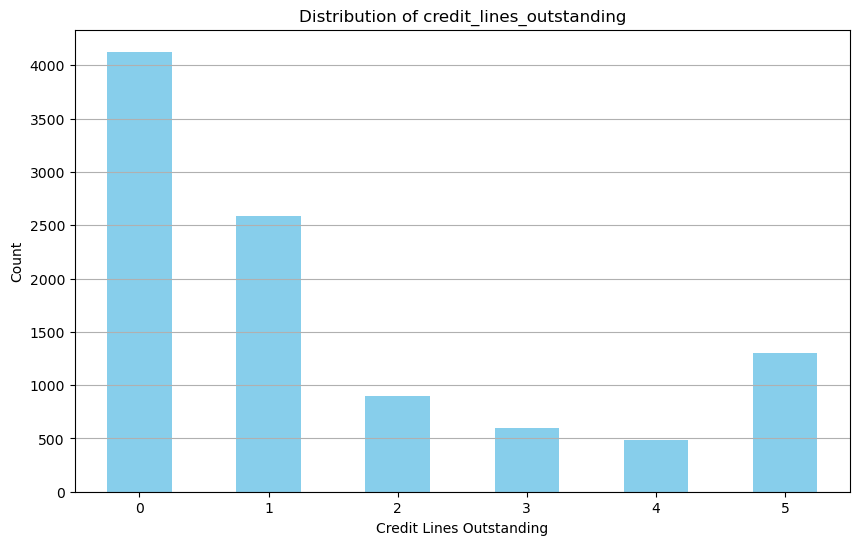

In [40]:
# Calculer la distribution des valeurs
distribution = df["credit_lines_outstanding"].value_counts().sort_index()

# Visualiser la distribution
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')  # Utiliser la distribution calculée
plt.title('Distribution of credit_lines_outstanding')
plt.xlabel('Credit Lines Outstanding')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



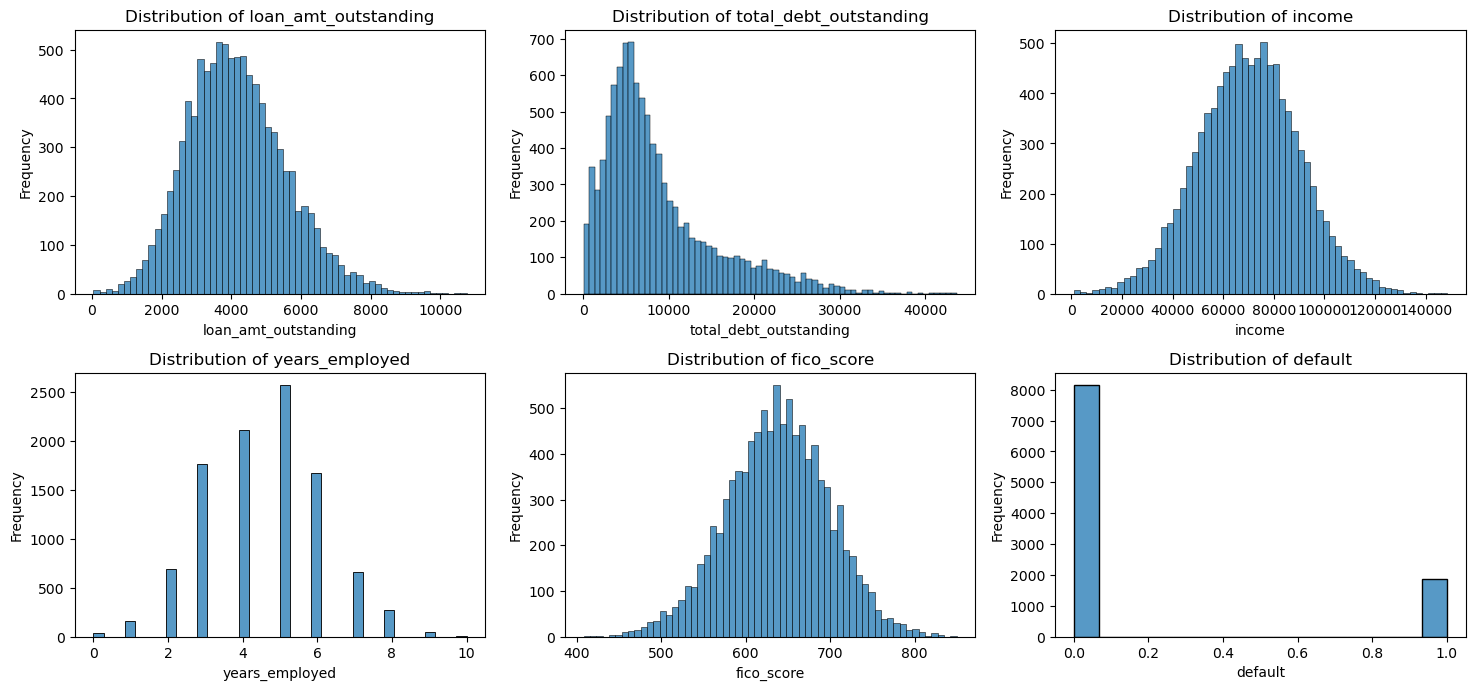

In [41]:
# Garphique de Distribution des variables numeriques
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


#### ANALYSE BIVARIEE

In [42]:
# Création de tableaux croisés entre notre variable cible et les variables catégorielles
for var in CATEGORICALS:
    table = pd.crosstab(index=df[var], columns=df['default'], margins=False)

    # Renommer les colonnes 
    table.rename(columns={1: 'Effectif_Default', 0: 'Effectif_Non_Default'}, inplace=True)
    
    # Calcul du total et du taux de défaut
    table['Effectif_Total'] = table['Effectif_Default'] + table['Effectif_Non_Default']
    table['Taux_Default (%)'] = (table['Effectif_Default'] / table['Effectif_Total'] * 100).round(3)

    # Réorganisation du tableau (sans la colonne Effectif_Non_Default)
    table = table[['Effectif_Total', 'Effectif_Default', 'Taux_Default (%)']]
    
    print(f"\nTableau de contingence entre '{var}' et 'Default' de remboursement :\n")
    print(table)



Tableau de contingence entre 'credit_lines_outstanding' et 'Default' de remboursement :

default                   Effectif_Total  Effectif_Default  Taux_Default (%)
credit_lines_outstanding                                                    
0                                   4128                 0              0.00
1                                   2590                 0              0.00
2                                    902                 7              0.78
3                                    599               137             22.87
4                                    484               412             85.12
5                                   1297              1295             99.85


In [43]:

# Nom de la variable catégorielle à tester
variable_categorielle = 'credit_lines_outstanding'  # Remplacez par le nom de votre variable

# Création du tableau croisé
table = pd.crosstab(df[variable_categorielle], df['default'])

# Test du chi-carré
stat, p, dof, expected = chi2_contingency(table)
significant = p < 0.05  # Significativité: (p < 0.05)

# Résultats du test
results = {
    'Variable': variable_categorielle,
    'Chi_square_statistic': stat,
    'Degrees_of_freedom': dof,
    'P_value': p,
    'Significant': '***' if significant else ''
}

summary_table = pd.DataFrame([results])

# Affichage du tableau récapitulatif en format Markdown 
try:
    import tabulate
    print(summary_table.to_markdown(index=False))
except ImportError:
    print("""La bibliothèque 'tabulate' n'est pas installée. 
          Affichage du tableau sans formatage Markdown.""")
    print(summary_table)

print("\n *** : Significatif au seuil 5% ")


| Variable                 |   Chi_square_statistic |   Degrees_of_freedom |   P_value | Significant   |
|:-------------------------|-----------------------:|---------------------:|----------:|:--------------|
| credit_lines_outstanding |                8833.86 |                    5 |         0 | ***           |

 *** : Significatif au seuil 5% 


In [44]:
# Supprimer la Target 'Default' dans la liste des Features numercis
NUMERICS = [col for col in NUMERICS if col != 'default']
print("\nLes variables numériques:")
NUMERICS


Les variables numériques:


['loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

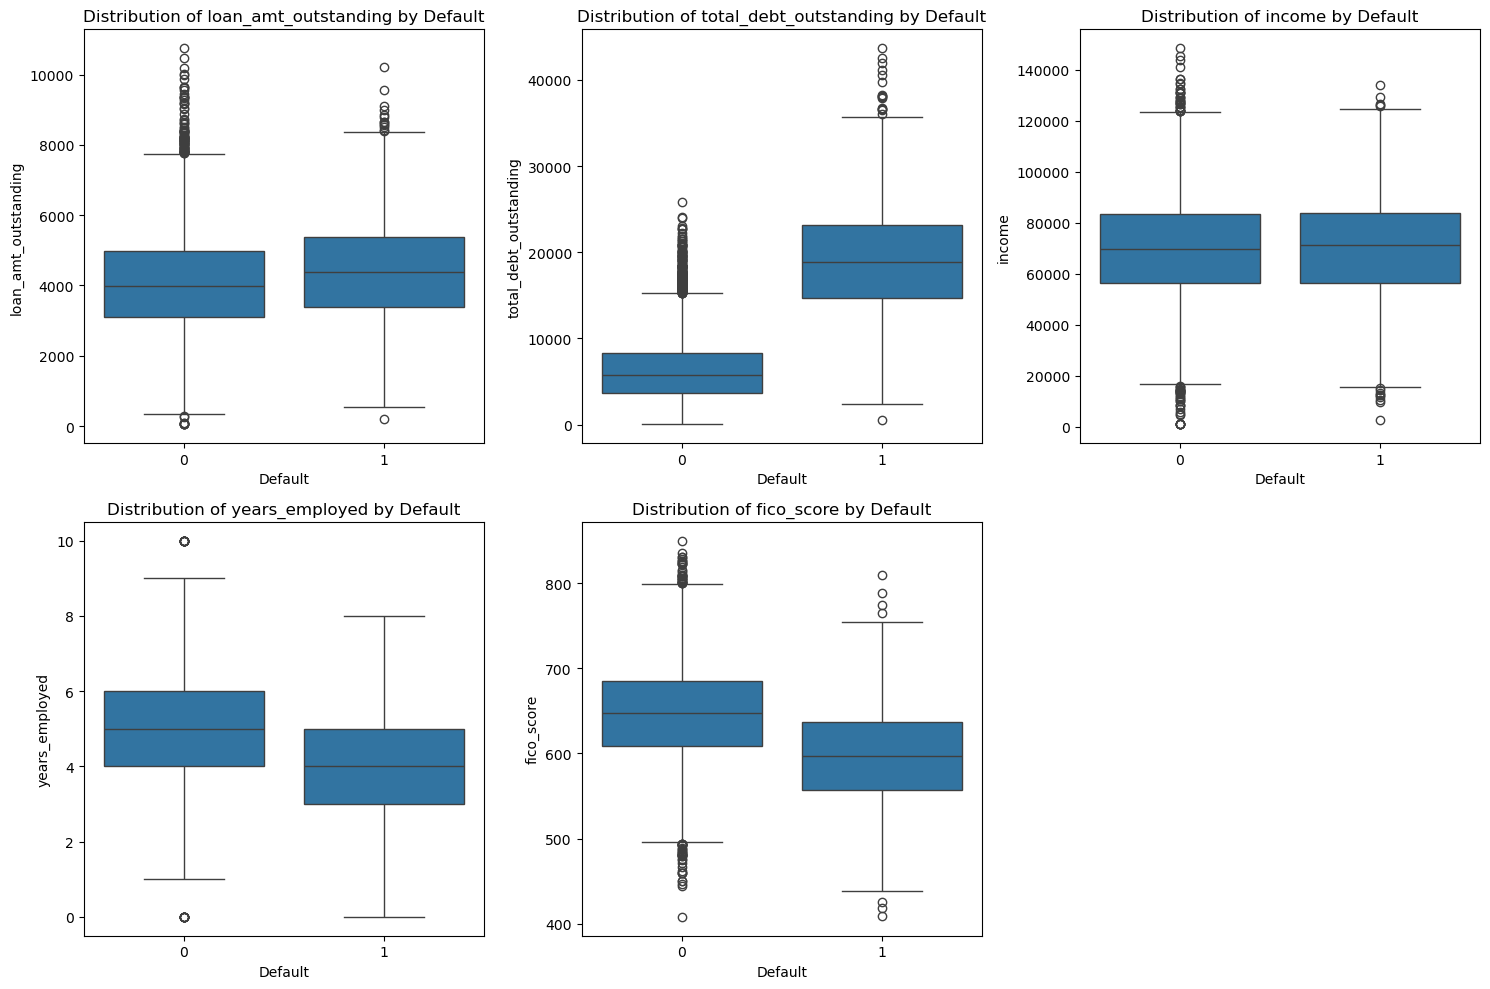


 0: Pas de Defaut de remboursement
 1: Defaut de remboursement


In [45]:
# Rélation entre Default(Defaut de rembourssemnt) et explicatives continue: Boxplot

plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f'Distribution of {col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n 0: Pas de Defaut de remboursement\n 1: Defaut de remboursement")


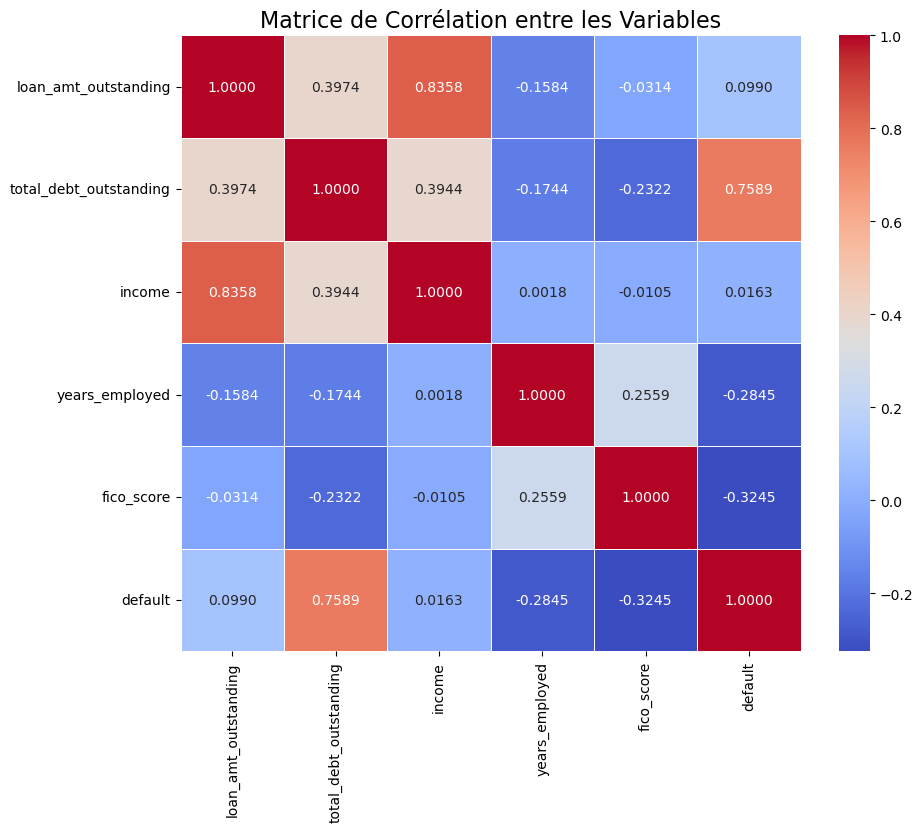

In [46]:
# la matrice de corrélation: Rélation entre 'default' et explicatives  continues: 
# Permet de soupçonnner un un problème d'endogenéité
correlation_matrix = df[NUMERICS + ['default']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables', fontsize=16)
plt.show()

In [47]:

# Afficher les corrélations avec la variable cible
print(correlation_matrix['default'].sort_values(ascending=False))


default                   1.00
total_debt_outstanding    0.76
loan_amt_outstanding      0.10
income                    0.02
years_employed           -0.28
fico_score               -0.32
Name: default, dtype: float64


In [48]:
# Afficher les paires de variables avec une forte corrélation (au-dessus de 0.8 ou en-dessous de -0.8)
strong_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
print("Variables fortement corrélées :\n", strong_corr)

Variables fortement corrélées :
                         loan_amt_outstanding  total_debt_outstanding  income  \
loan_amt_outstanding                    1.00                     NaN    0.84   
total_debt_outstanding                   NaN                    1.00     NaN   
income                                  0.84                     NaN    1.00   
years_employed                           NaN                     NaN     NaN   
fico_score                               NaN                     NaN     NaN   
default                                  NaN                     NaN     NaN   

                        years_employed  fico_score  default  
loan_amt_outstanding               NaN         NaN      NaN  
total_debt_outstanding             NaN         NaN      NaN  
income                             NaN         NaN      NaN  
years_employed                    1.00         NaN      NaN  
fico_score                         NaN        1.00      NaN  
default                           

#### PREPROCESSING (Preparing data for machine learning)

###### NETTOYADE DES DONNEES

In [49]:
# Verification des NA par colonne
df.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [50]:
df_len=len(df)

In [52]:
# Calcul du premier quartile (Q1) et du troisième quartile (Q3)
Q1 = df['total_debt_outstanding'].quantile(0.25)
Q3 = df['total_debt_outstanding'].quantile(0.75)

# Intervalle Interquartile (IQR)
IQR = Q3 - Q1

# Définir un nouveau coefficient pour augmenter la limite supérieure: (2.5)
coefficient = 2.5

# Définir les nouvelles limites  supérieure

limite_superieure = Q3 + coefficient * IQR  # Utilisation du nouveau coefficient pour la limite supérieure

# Filtrer les données pour garder les total_debt_outstanding dans les nouvelles limites
df = df[(df['total_debt_outstanding'] <= limite_superieure)]

# Afficher le nombre de lignes avant et après le filtrage
print(f"Nombre de lignes avant traitement : {df_len}")
print(f"Nombre de lignes après traitement : {len(df)}")


Nombre de lignes avant traitement : 10000
Nombre de lignes après traitement : 9841


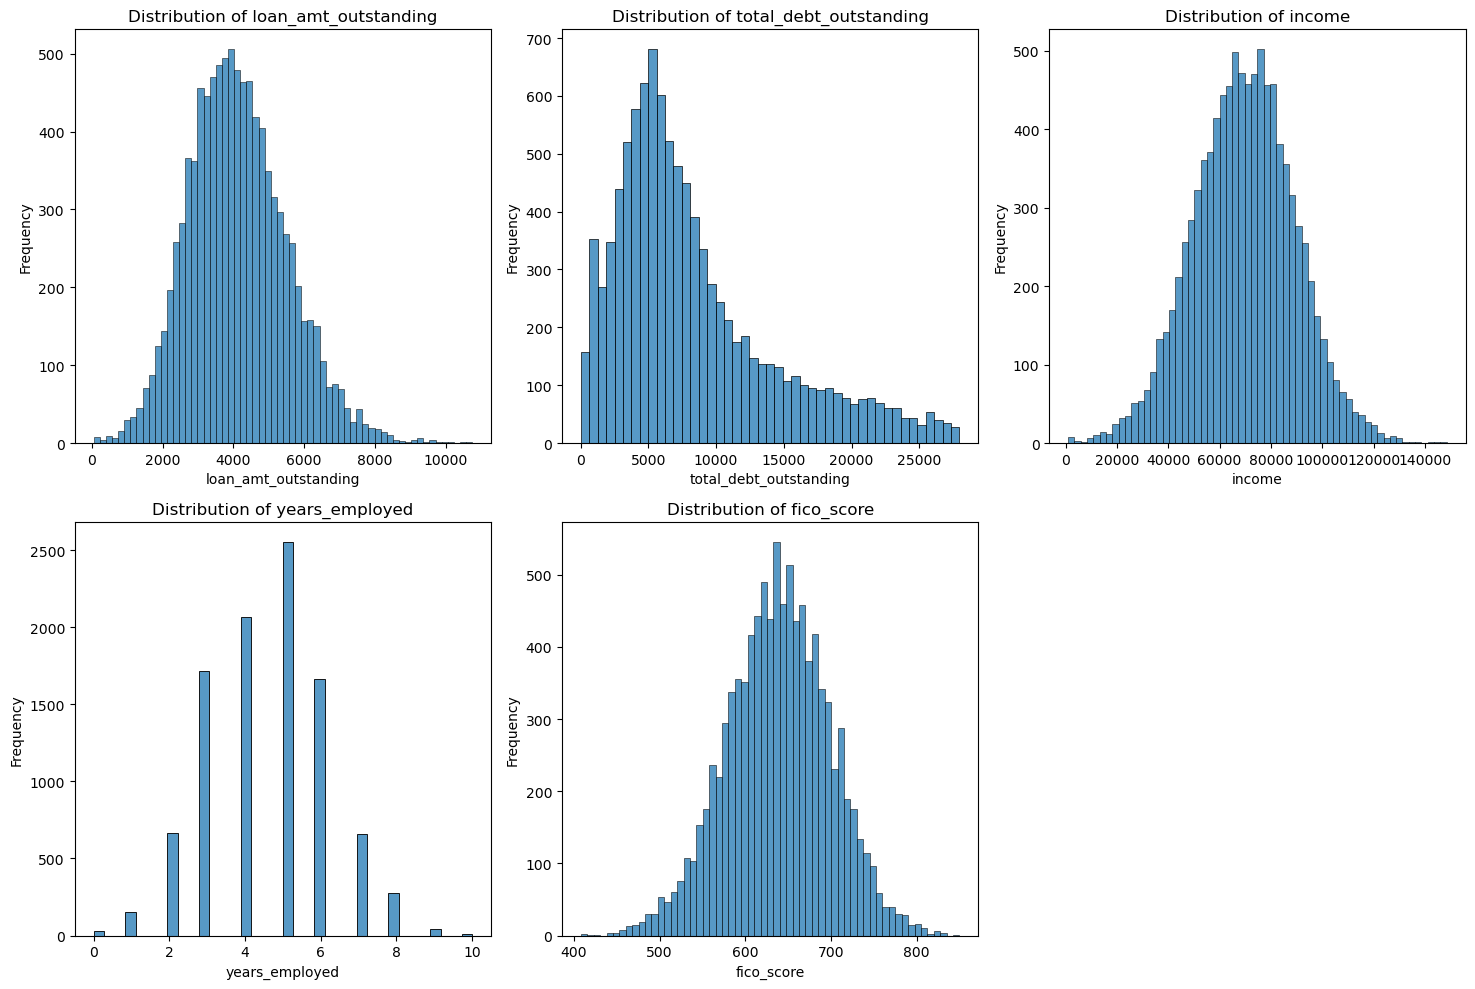

In [53]:
# Garphique de Distribution après traitement dela variable : total_debt_outstanding
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


In [54]:
# Nouvelle distribution de default
df['default'].value_counts(normalize=True)

default
0   0.83
1   0.17
Name: proportion, dtype: float64

##### Régrouper les variables en Features (X) et cible(y=Default) 

In [55]:

CATEGORICALS= list(CATEGORICALS)
X = df[NUMERICS + CATEGORICALS]
y = df['default']

In [56]:
# Les colonnes des FEATURES
X.columns

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')

In [57]:
# Diviser les données en ensembles d'entraînement et de test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Pipline de traitement des données

In [58]:
# Variables numériques
NUMERICS = X_train.select_dtypes(include=['float64','int64']).columns.tolist()  

# Colonnes catégorielles
CATEGORICALS = X_train.select_dtypes(include=['category']).columns.tolist() 

#### Recherche d'une multicolinérité

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Initialiser le scaler
scaler = StandardScaler()

# Normaliser les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Créer un DataFrame pour stocker les résultats du VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns

# Calculer le VIF pour chaque variable
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

                   Variable  VIF
0      loan_amt_outstanding 3.61
1    total_debt_outstanding 8.25
2                    income 4.72
3            years_employed 1.26
4                fico_score 1.14
5  credit_lines_outstanding 7.20


les variables suivantes présentent des valeurs de VIF élevées, indiquant une forte multicolinéarité :

credit_lines_outstanding : 7.22
total_debt_outstanding : 8.31

Dans le cadre de la régression logistique, nous allons supprimer une de ces variable pour une bonne analyse

In [60]:
# Normalisation des variables quantitatives et encodage des variables qualitatives

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [61]:
# Appliquer la pipline de traitement au données 
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

#### ENTRAINEMENT DES MODELES 

#### Nous allons entrainer 02 modèles

| Critère                      | Modèle Logistique                                                 | XGBoost                                                              |
|------------------------------|------------------------------------------------------------------|----------------------------------------------------------------------|
| **Type de Modèle**            | Linéaire                                                         | Boosting d'arbres non linéaires                                      |
| **Gestion des Données Déséquilibrées** | Moyenne (peut être améliorée avec `class_weight`)             | Excellente (peut gérer naturellement les déséquilibres et `scale_pos_weight` peut être utilisé) |
| **Complexité**                | Faible                                                           | Élevée                                                              |
| **Interprétabilité**          | Élevée                                                           | Faible                                                              |
| **Performance**               | Moyenne sur des données simples                                   | Très élevée sur des données complexes                                 |
| **Sensibilité au Bruit**      | Modérée                                                          | Modérée à Faible                                                    |
| **Temps d'entraînement**      | Rapide                                                           | Plus long                                                           |


#####  Modele XGBoost, Logistique 
Niveau 1: Modeles sans (réchantillonnage et undersampling)

#### MODELES: Régression Logistique, XGBoost (avec validation croisée)

#### Régression Logistique 

In [62]:
print("Colonnes dans X_train :", X_train.columns)
print("Colonnes dans X_test :", X_test.columns)


Colonnes dans X_train : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')
Colonnes dans X_test : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')


In [63]:
# Normalisation des variables quantitatives et encodage des variables qualitatives
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [64]:
# Appliquer la pipeline de traitement aux données 
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [66]:
# Suppression de 'total_debt_outstanding' en raison de son VIF élevé
X_train_1 = X_train.drop(columns=['total_debt_outstanding'])
X_test_1 = X_test.drop(columns=['total_debt_outstanding'])


In [67]:
X_train_1.columns

Index(['loan_amt_outstanding', 'income', 'years_employed', 'fico_score',
       'credit_lines_outstanding'],
      dtype='object')

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Exemples de définition
NUMERICS = ['loan_amt_outstanding', 'income', 'years_employed', 'fico_score']
CATEGORICALS = ['credit_lines_outstanding']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICS),
        ('cat', OneHotEncoder(), CATEGORICALS)
    ]
)



In [69]:
# ---- Modèle 1 : Régression Logistique ----

# Suppression de 'total_debt_outstanding' en raison de son VIF élevé
X_train_1 = X_train.drop(columns=['total_debt_outstanding'])
X_test_1 = X_test.drop(columns=['total_debt_outstanding'])

logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de rappel
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train_1, y_train), 1):
        X_train_fold, X_test_fold = X_train_1.iloc[train_index], X_train_1.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        
        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_1_preprocessed = preprocessor.transform(X_test_1)  # Appliquer le prétraitement sur l'ensemble de test
logistic_y_test_pred = logistic_model.predict(X_test_1_preprocessed)

# Rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1301
                 1       0.96      1.00      0.98       274
      
          accuracy                           0.99      1575
         macro avg       0.98      0.99      0.99      1575
      weighted avg       0.99      0.99      0.99      1575
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 1:                                                               

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Exemples de définition
NUMERICS = ['loan_amt_outstanding', 'income', 'years_employed', 'fico_score']
CATEGORICALS = ['credit_lines_outstanding']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICS),
        ('cat', OneHotEncoder(), CATEGORICALS)
    ]
)

In [71]:
# ---- Modèle 2 : Régression Logistique avec régularisation l1  sans suppression----
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
logistic_y_test_pred = logistic_model.predict(preprocessor.transform(X_test))

# rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1301
                 1       0.96      1.00      0.98       274
      
          accuracy                           0.99      1575
         macro avg       0.98      0.99      0.99      1575
      weighted avg       0.99      0.99      0.99      1575
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 1:                                                               

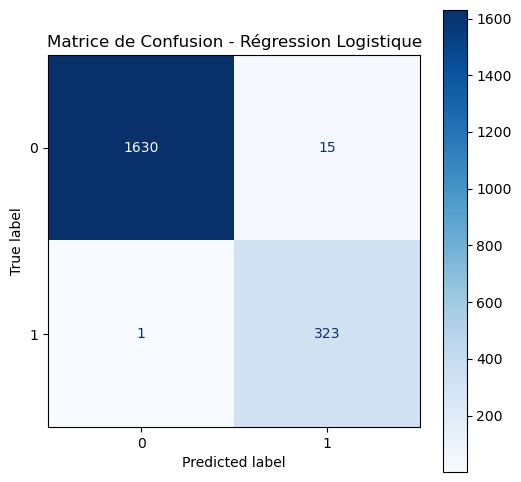

In [72]:
# Matrice de confusion pour le modèle de Régression Logistique
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion
ConfusionMatrixDisplay(logistic_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - Régression Logistique')  # Ajouter un titre
plt.show()

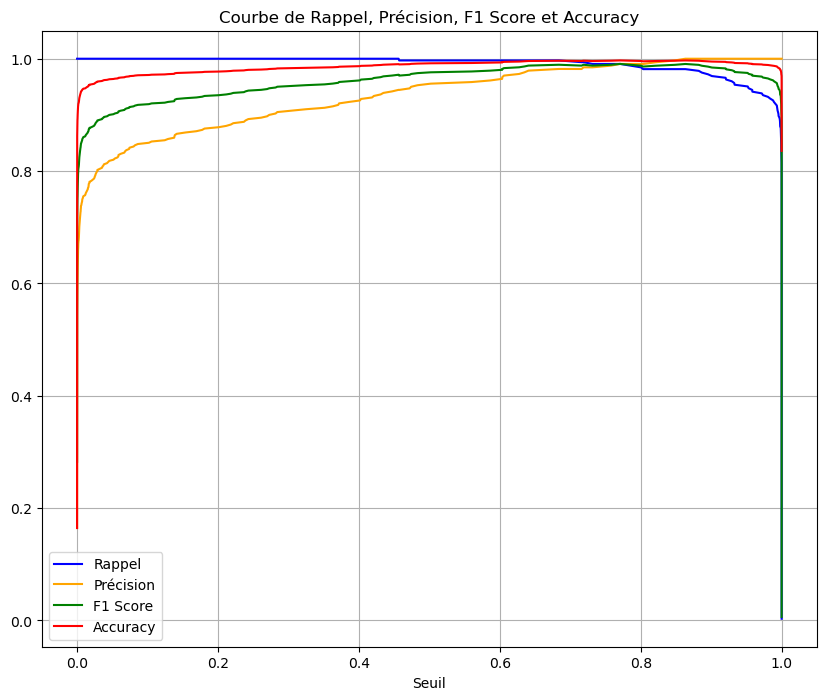

In [73]:
from sklearn.metrics import f1_score, accuracy_score

# Obtenir les probabilités de prédiction
logistic_y_proba = logistic_model.predict_proba(preprocessor.transform(X_test))[:, 1]

# Calculer la courbe de précision, rappel et seuils
precision, recall, thresholds = precision_recall_curve(y_test, logistic_y_proba)

# Calculer le F1 score et l'accuracy pour chaque seuil
f1_scores = [f1_score(y_test, logistic_y_proba >= t) for t in thresholds]
accuracies = [accuracy_score(y_test, logistic_y_proba >= t) for t in thresholds]

# Tracer la courbe de précision-rappel et les scores F1 et accuracy
plt.figure(figsize=(10, 8))
plt.plot(thresholds, recall[:-1], label='Rappel', color='blue')
plt.plot(thresholds, precision[:-1], label='Précision', color='orange')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.plot(thresholds, accuracies, label='Accuracy', color='red')
plt.xlabel('Seuil')
plt.title('Courbe de Rappel, Précision, F1 Score et Accuracy')
plt.legend()
plt.grid()
plt.show()


In [74]:
# Extraction des coefficients et des noms des features
logistic_coefficients = logistic_model.coef_[0]
feature_names = preprocessor.get_feature_names_out()  # Obtenir les noms des features

# Créer un DataFrame pour les coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_coefficients
})

# Calculer la valeur absolue des coefficients pour l'importance
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()

# Seuil de significativité des coefficients (0.05)
significant_threshold = 0.05

# Filtrer les coefficients significatifs
significant_importance_df = importance_df[importance_df['Absolute_Coefficient'] > significant_threshold]

# Trier par importance absolue
significant_importance_df = significant_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Calculer la somme des coefficients significatifs
sum_significant_abs_coefficients = significant_importance_df['Absolute_Coefficient'].sum()

# Créer un score basé sur les coefficients significatifs (en pourcentage)
significant_importance_df['Score'] = (significant_importance_df['Absolute_Coefficient'] / sum_significant_abs_coefficients) * 100

# Afficher les résultats
print("Les variables significatives avec leurs scores :")
print(significant_importance_df[['Feature', 'Coefficient', 'Score']])

# Couleurs pour le graphique
significant_importance_df['Color'] = significant_importance_df['Score'].apply(lambda x: 'green' if x > 0 else 'red')

# Visualisation
fig = px.bar(
    significant_importance_df,
    x='Score',
    y='Feature',
    color='Color',
    color_discrete_map={'green': 'green', 'red': 'red'},
    title='Scores des Variables Significatives - Régression Logistique',
    labels={'Score': 'Score (%)', 'Feature': 'Variable'}
)

# Ajouter une ligne verticale pour le score zéro
fig.add_shape(type="line", x0=0, x1=0, y0=-1, y1=len(significant_importance_df)-1, line=dict(color="grey", width=2, dash="dash"))
fig.show()

Les variables significatives avec leurs scores :
                           Feature  Coefficient  Score
9  cat__credit_lines_outstanding_5        16.24  24.26
5  cat__credit_lines_outstanding_1       -13.46  20.10
4  cat__credit_lines_outstanding_0       -12.49  18.66
8  cat__credit_lines_outstanding_4         9.30  13.90
6  cat__credit_lines_outstanding_2        -8.98  13.42
2              num__years_employed        -4.73   7.06
3                  num__fico_score        -1.45   2.17
0        num__loan_amt_outstanding         0.15   0.23
1                      num__income        -0.14   0.21


In [75]:
# ---- Modèle 3 : XGBoost ----
from sklearn.tree import DecisionTreeClassifier

xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss')

# Liste scores
xgb_recall_scores = []
xgb_y_pred_all = []  # Pour stocker les prédictions du modèle XGBoost

# Appliquer la validation croisée sur le modèle XGBoost
with alive_bar(n_splits, title="Évaluation du modèle XGBoost", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle XGBoost
        xgb_model.fit(X_train_fold_preprocessed, y_train_fold)
        xgb_y_pred_fold = xgb_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        xgb_y_pred_all.extend(xgb_y_pred_fold)

        # Calculer le score de rappel pour chaque modèle
        xgb_recall = recall_score(y_test_fold, xgb_y_pred_fold)
        xgb_recall_scores.append(xgb_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nXGBoost :\n")
        print(classification_report(y_test_fold, xgb_y_pred_fold))
        
        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour le modèle
mean_xgb_recall = np.mean(xgb_recall_scores)
print(f"\nLe rappel moyen pour XGBoost sur {n_splits} plis est : {mean_xgb_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)  # Prétraiter les données de test
xgb_y_test_pred = xgb_model.predict(X_test_preprocessed)  # Prédictions sur l'ensemble de test

# Rapport de classification final
print("\nRapport de classification final pour XGBoost :\n")
print(classification_report(y_test, xgb_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 0:                                                                           
      XGBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      1.00      1.00      1301
                 1       0.99      0.99      0.99       274
      
          accuracy                           1.00      1575
         macro avg       0.99      0.99      0.99      1575
      weighted avg       1.00      1.00      1.00      1575
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 1:                                                                           
 

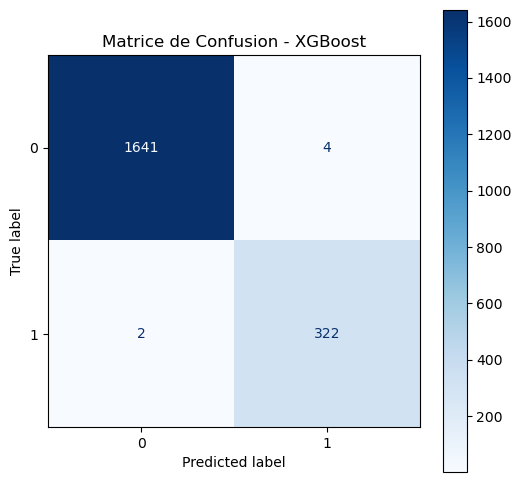

In [76]:
# Matrice de confusion pour le modèle XGBoost
xgb_cm = confusion_matrix(y_test, xgb_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion

# Matrice de confusion XGBoost
ConfusionMatrixDisplay(xgb_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - XGBoost')  # Ajouter un titre

plt.show()


#### Interpretation 

Ce graphique montre l'importance des caractéristiques utilisées par le modèle XGBoost, classées par leur influence sur la prédiction.

 Les caractéristiques les plus influentes en haut du graphique incluent la possession d'une hypothèque (cat_HasMortgage_Yes) et le fait d'avoir des personnes à charge (cat_HasDependents_Yes), indiquant qu'elles jouent un rôle significatif dans les prédictions du modèle. 
 
 Les caractéristiques financières comme le ratio dette/revenu (num_DTiRatio) sont également importantes, mais moins que certains facteurs catégoriels, suggérant un modèle complexe où les données démographiques et de prêt sont toutes deux cruciales pour déterminer le risque de défaut.

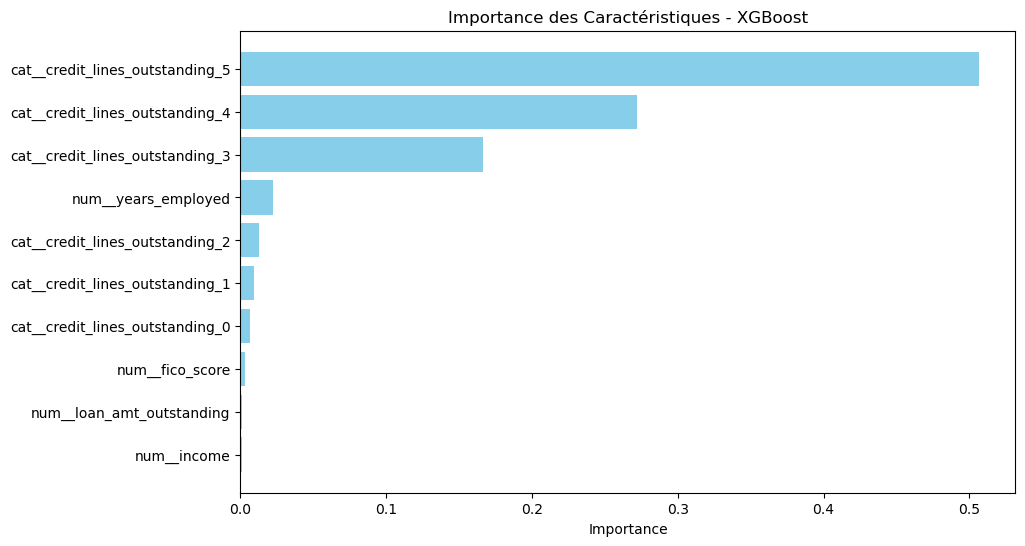

In [77]:
# ---- Importance des caractéristiques ----
# Extraire les importances
feature_importances = xgb_model.feature_importances_

# Créer un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': feature_importances
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Caractéristiques - XGBoost')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher la plus importante en haut
plt.show()

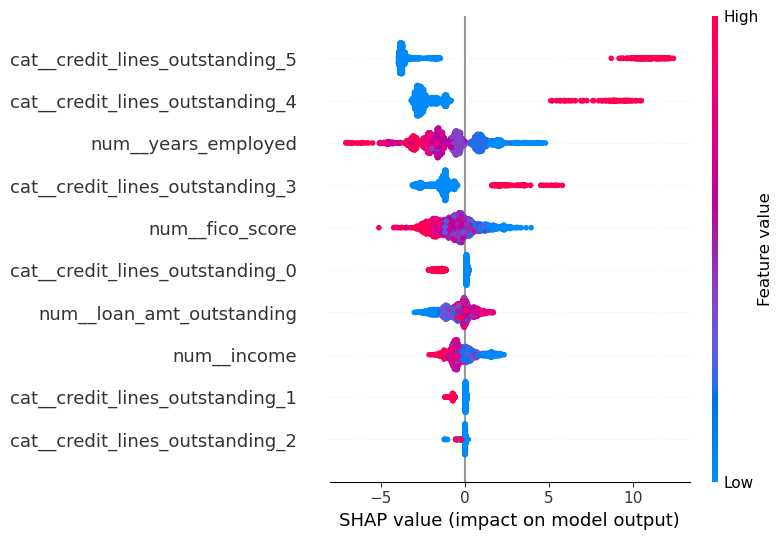

In [78]:
import shap

# ---- Calculer les valeurs SHAP pour le modèle XGBoost ----
explainer = shap.Explainer(xgb_model)  # Créer l'explainer
X_test_preprocessed = preprocessor.transform(X_test)  # Transformer l'ensemble de test
shap_values = explainer(X_test_preprocessed)  # Calculer les valeurs SHAP

# Visualiser les valeurs SHAP avec un graphique résumé
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessor.get_feature_names_out())

# Créer un objet d'explication pour la première instance
single_shap_value = shap_values[0]  # Obtenir la première valeur SHAP
single_instance = X_test_preprocessed[0]  # Obtenir la première instance

# Visualisation de la force des valeurs SHAP
shap.initjs()  # Initialiser la visualisation JS
shap.force_plot(explainer.expected_value, single_shap_value.values, single_instance, feature_names=preprocessor.get_feature_names_out())


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
import mlflow
import mlflow.sklearn
import numpy as np
import time
from alive_progress import alive_bar

# ---- Modèle 2 : Régression Logistique avec régularisation l1  sans suppression----
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)
logistic_y_test_pred = logistic_model.predict(X_test_preprocessed)

# Rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))



on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1301
                 1       0.96      1.00      0.98       274
      
          accuracy                           0.99      1575
         macro avg       0.98      0.99      0.99      1575
      weighted avg       0.99      0.99      0.99      1575
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6297, Taille de Test : 1575 ---               
on 1:                                                               

### Modèle final: Régression Logistique

In [ ]:

# ---- Évaluation sur un ensemble de validation et intégration avec MLflow ----
# Split the data into training and validation sets (ici, X et y sont déjà définis)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# Lancer le contexte MLflow pour suivre le modèle et ses résultats
with mlflow.start_run(run_name="Logistic_Regression_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle entraîné pour une utilisation future
    mlflow.sklearn.log_model(
        sk_model=logistic_model, input_example=X_val, artifact_path="logistic_regression_model"
    )


In [ ]:
import pickle
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- Évaluation sur un ensemble de validation et intégration avec MLflow ----
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# ---- Enregistrement du modèle avec Pickle ----
model_path = "logistic_model.pkl"  
with open(model_path, 'wb') as file:
    pickle.dump(logistic_model, file)

print(f"Modèle enregistré sous {model_path}")

# ---- Suivi avec MLflow ----
with mlflow.start_run(run_name="Logistic_Regression_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle enregistré avec Pickle pour une utilisation future
    mlflow.log_artifact(model_path)  # Enregistrement du fichier modèle avec MLflow


In [82]:
# Charger le modèle
with open("LR_model.pkl", "rb") as f:
    model = pickle.load(f)

# Afficher les noms des caractéristiques attendues
try:
    print("Feature names expected by the model:", model.feature_names_in_)
except AttributeError:
    print("Le modèle n'a pas l'attribut 'feature_names_in_'")


Feature names expected by the model: ['loan_amt_outstanding' 'total_debt_outstanding' 'income' 'years_employed'
 'fico_score' 'credit_lines_outstanding']


In [83]:
# Créer un DataFrame de test avec les colonnes dans l'ordre attendu
test_features = pd.DataFrame([[4320.885196,	20824.144090,	73353.97980,	5,	661, 5]], 
                             columns=["loan_amt_outstanding", "total_debt_outstanding", "income", "years_employed", "fico_score", "credit_lines_outstanding"])

# Prédiction
prediction = model.predict(test_features)
print("Prédiction :", prediction)

5	

Prédiction : [1]


5

In [84]:
df.head(3)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.55,3915.47,78039.39,5,605,0
1,5,1958.93,8228.75,26648.44,2,572,1
2,0,3363.01,2027.83,65866.71,4,602,0
